In [1]:
from To_sim.for_multi import get_r_sigma_Z_D,get_r_sigma_Z_MF_D
import numpy as np
import parmap
from tqdm.notebook import tqdm
import networkx as nx
import matplotlib.pyplot as plt

# MF Graph

In [70]:
N = 1000
np.random.seed(0)
theta_random = np.random.uniform(0,2*np.pi,N)
omega = 1
K,b = 5,1.1
db = 0.1
t_end,dt = 400,0.01
t = np.arange(0, t_end+dt/2, dt)
Ds = np.arange(0,2.+db/2,db)

In [71]:
B_R,B_S,B_C = [],[],[]

for seed in tqdm(range(10)):
    np.random.seed(0)
    theta_random = np.random.uniform(0,2*np.pi,N)
    B_rs = []
    B_sigmas = []    
    B_chis = []
    for r_m,sigma,chi in parmap.map(get_r_sigma_Z_MF_D,Ds,theta_random,t,b,omega,N,K,pm_pbar=False, pm_processes=10):
        B_rs.append(r_m)
        B_sigmas.append(sigma)
        B_chis.append(chi)
    B_R.append(B_rs)
    B_S.append(B_sigmas)
    B_C.append(B_chis)

  0%|          | 0/10 [00:00<?, ?it/s]

In [72]:
BRM = np.mean(B_R,axis=0)
BSM = np.mean(B_S,axis=0)
BCM = np.mean(B_C,axis=0)

BRS = np.std(B_R,axis=0)
BSS = np.std(B_S,axis=0)
BCS = np.std(B_C,axis=0)

In [74]:
np.savez('DATA/MF_ENSEMBLE',BRM=BRM,BSM=BSM,BCM=BCM,BRS=BRS,BSS=BSS,BCS=BCS,b=b,Ds=Ds)

<ErrorbarContainer object of 3 artists>

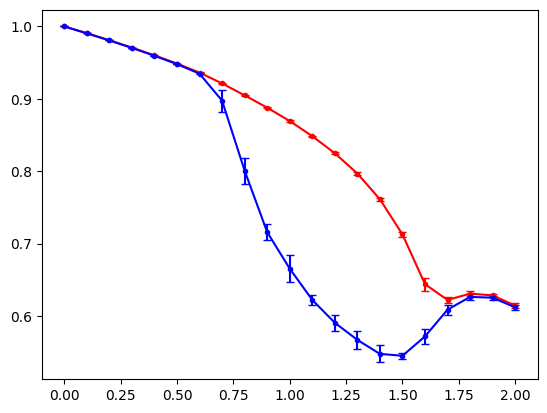

In [75]:
plt.errorbar(Ds,BRM,BRS,capsize=3,fmt='.-',color='red')
plt.errorbar(Ds,BSM,BSS,capsize=3,fmt='.-',color='blue')
# plt.errorbar(Ds,BRM,BRC)

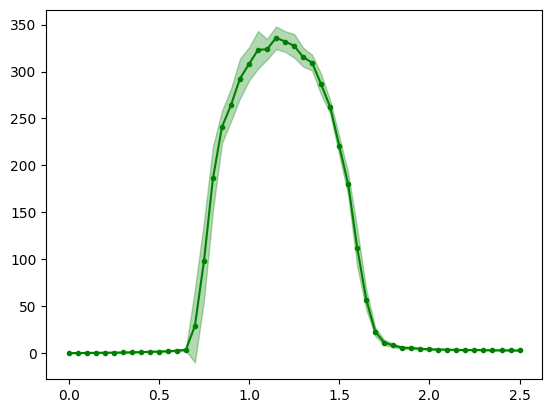

In [53]:
plt.plot(Ds,BCM,'g.-')
plt.fill_between(Ds,BCM-BCS,BCM+BCS,alpha=0.3,color='green')

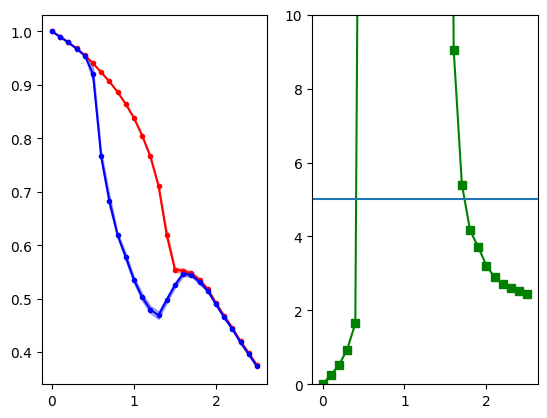

In [22]:
plt.subplot(121)
plt.plot(Ds,BRM,'r.-')
plt.fill_between(Ds,BRM-BRS,BRM+BRS,color='red',alpha=0.3)
plt.plot(Ds,BSM,'b.-')
plt.fill_between(Ds,BSM-BSS,BSM+BSS,color='blue',alpha=0.3)

plt.subplot(122)
plt.plot(Ds,BCM,'gs-')
plt.ylim(0,10)
plt.axhline(5)

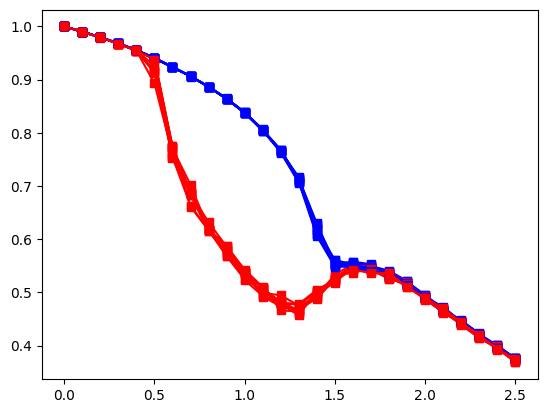

In [5]:
for i in range(10):
    B_rs = B_R[i]
    B_sigmas = B_S[i]
    plt.plot(Ds,B_rs,'bs-')
    plt.plot(Ds,B_sigmas,'rs-')

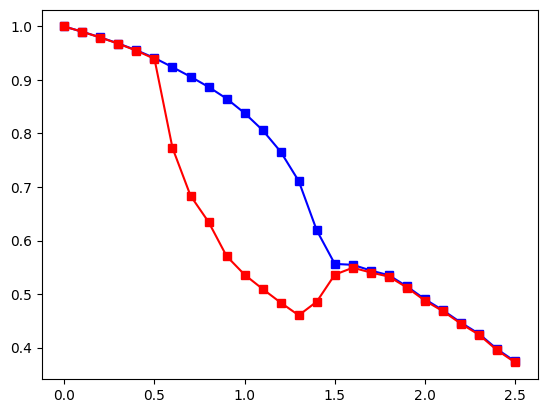

In [14]:
plt.plot(Ds,B_rs,'bs-')
plt.plot(Ds,B_sigmas,'rs-')

# DATA LOAD

In [76]:
AR_MF = np.load('DATA/MF N = 1000 db=0.04 K = 5 000.npz')
AR_ER = np.load('DATA/ER N = 1000 mk = 6.0 db=0.04 K = 5 000.npz')
AR_SF = np.load('DATA/SF N = 1000 m = 3 db=0.04 000.npz')

# ER network

In [ ]:
# 초기 네트워크 생성 파라미터 설정
num_nodes = 1000
p = 6 / (num_nodes - 1)

def generate_network(num_nodes, p):
    while True:
        # ER 네트워크 생성
        G = nx.erdos_renyi_graph(num_nodes, p)
        
        # 외부 링크가 없는 노드 제거
        G.remove_nodes_from(list(nx.isolates(G)))
        
        # 노드 수가 1000개가 되면 종료
        if len(G.nodes()) == num_nodes:
            break
    
    return G

# 네트워크 생성
Gs = []
mk = 1
while mk != 6:
    G = generate_network(num_nodes, p)
    A = nx.adjacency_matrix(G)
    Aij = A.todense()
    Deg = Aij.sum(axis=1)
    DegT = Deg.reshape(-1,1)
    mk = Deg.mean()
    print(mk)

In [82]:
print(*AR_ER.keys())

Ds bs D_mrij D_sij D_chiij G


In [83]:
G = AR_ER['G']

In [127]:
N = 1000
np.random.seed(0)
theta_random = np.random.uniform(0,2*np.pi,N)
omega = 1
K,b = 5,1.1
db = 0.1
t_end,dt = 400,0.01
t = np.arange(0, t_end+dt/2, dt)
Ds = np.arange(0,2.+db/2,db)

In [128]:
B_R,B_S,B_C = [],[],[]

for seed in tqdm(range(10)):
    B_rs = []
    B_sigmas = []    
    B_chis = []
    for r_m,sigma,chi in parmap.map(get_r_sigma_Z_D,Ds,theta_random,t,b,omega,N,K,mk,Aij,pm_pbar=False, pm_processes=10):
        B_rs.append(r_m)
        B_sigmas.append(sigma)
        B_chis.append(chi)
    B_R.append(B_rs)
    B_S.append(B_sigmas)
    B_C.append(B_chis)

  0%|          | 0/10 [00:00<?, ?it/s]

In [129]:
BRM = np.mean(B_R,axis=0)
BSM = np.mean(B_S,axis=0)
BCM = np.mean(B_C,axis=0)

BRS = np.std(B_R,axis=0)
BSS = np.std(B_S,axis=0)
BCS = np.std(B_C,axis=0)

<ErrorbarContainer object of 3 artists>

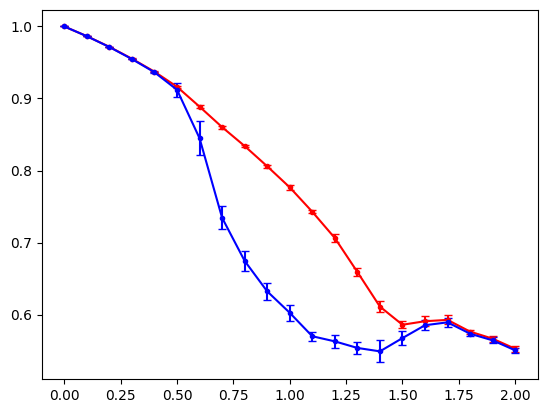

In [130]:
plt.errorbar(Ds,BRM,BRS,capsize=3,fmt='.-',color='red')
plt.errorbar(Ds,BSM,BSS,capsize=3,fmt='.-',color='blue')

In [131]:
np.savez('DATA/ER_ENSEMBLE',BRM=BRM,BSM=BSM,BCM=BCM,BRS=BRS,BSS=BSS,BCS=BCS,b=b,Ds=Ds)

# SF Network

In [132]:
m = 3
G = nx.barabasi_albert_graph(N,m)
A = nx.adjacency_matrix(G)
Aij = A.todense()
Deg = Aij.sum(axis=1)
DegT = Deg.reshape(-1,1)
mk = Deg.mean()
print(mk)

5.982


In [133]:
B_R,B_S,B_C = [],[],[]

for seed in tqdm(range(10)):
    B_rs = []
    B_sigmas = []    
    B_chis = []
    for r_m,sigma,chi in parmap.map(get_r_sigma_Z_D,Ds,theta_random,t,b,omega,N,K,mk,Aij,pm_pbar=False, pm_processes=10):
        B_rs.append(r_m)
        B_sigmas.append(sigma)
        B_chis.append(chi)
    B_R.append(B_rs)
    B_S.append(B_sigmas)
    B_C.append(B_chis)

  0%|          | 0/10 [00:00<?, ?it/s]

In [ ]:
BRM = np.mean(B_R,axis=0)
BSM = np.mean(B_S,axis=0)
BCM = np.mean(B_C,axis=0)

BRS = np.std(B_R,axis=0)
BSS = np.std(B_S,axis=0)
BCS = np.std(B_C,axis=0)

In [ ]:
plt.errorbar(Ds,BRM,BRS,capsize=3,fmt='.-',color='red')
plt.errorbar(Ds,BSM,BSS,capsize=3,fmt='.-',color='blue')

In [ ]:
np.savez('DATA/SF_ENSEMBLE',BRM=BRM,BSM=BSM,BCM=BCM,BRS=BRS,BSS=BSS,BCS=BCS,b=b,Ds=Ds)